In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette("magma_r")

In [2]:
train = pd.read_csv('data/train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
# inplace = True (overwrting the existing dataframe)
train.set_index('PassengerId', inplace=True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.shape


(891, 11)

In [7]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Pclass

In [11]:
train['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

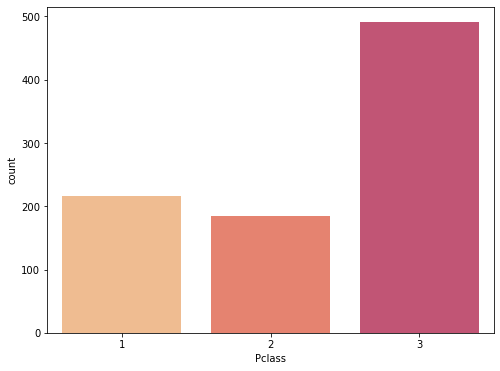

In [12]:
plt.figure(figsize = (8, 6))
sns.countplot(x = "Pclass", data = train)
plt.show()

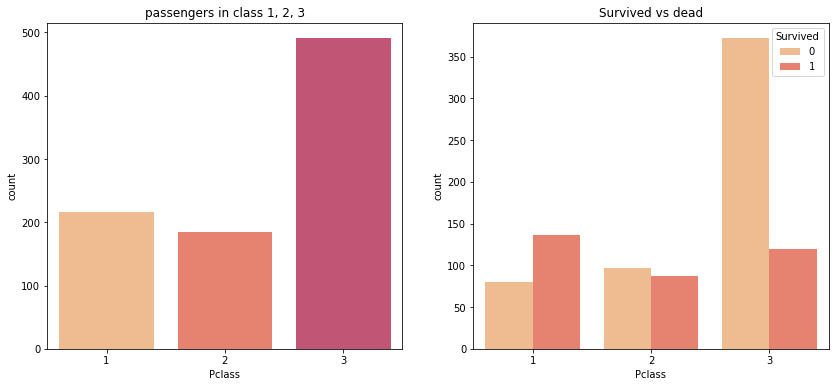

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(x = "Pclass", data = train, ax = ax[0])
ax[0].set_title("passengers in class 1, 2, 3")
sns.countplot(x = "Pclass", hue = "Survived", data = train, ax = ax[1])
ax[1].set_title("Survived vs dead")
plt.show()                       

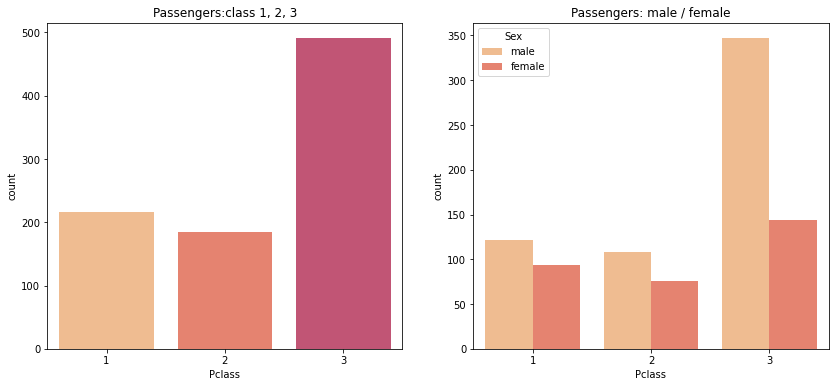

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(x = "Pclass", data = train, ax = ax[0])
ax[0].set_title("Passengers:class 1, 2, 3")
sns.countplot(x = "Pclass",hue = "Sex", data = train, ax = ax[1])
ax[1].set_title("Passengers: male / female")
plt.show()

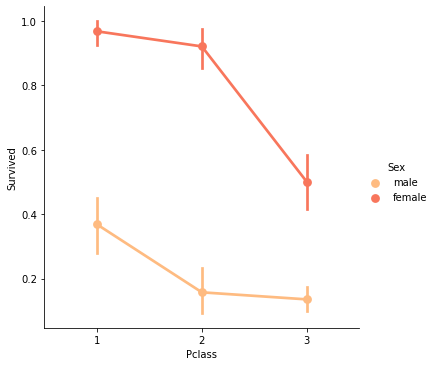

In [15]:
sns.catplot(x = "Pclass", y = "Survived", hue = "Sex", data = train, kind = "point")
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Sex-Survived'>

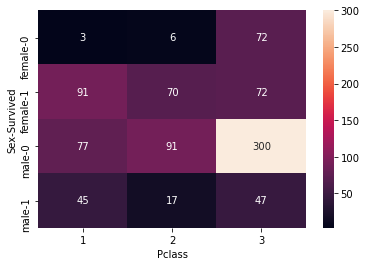

In [16]:
group = train.groupby(['Sex', 'Survived', 'Pclass'])
new_m = group.size().unstack()
sns.heatmap(new_m, annot = True, fmt = "d")

## Age

In [17]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
median_age = train['Age'].median()
train['Age'].fillna(value = median_age, inplace = True)

In [19]:
train['new_age'] = train['Age'].apply(lambda x : int(x/10))
train['new_age'].unique()

array([2, 3, 5, 0, 1, 4, 6, 7, 8], dtype=int64)

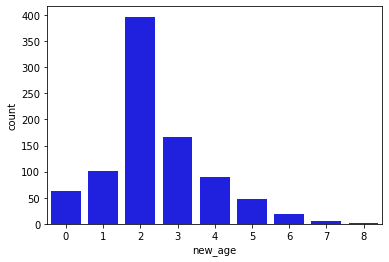

In [20]:
sns.countplot(x = 'new_age', data = train, color = "blue")
plt.show()

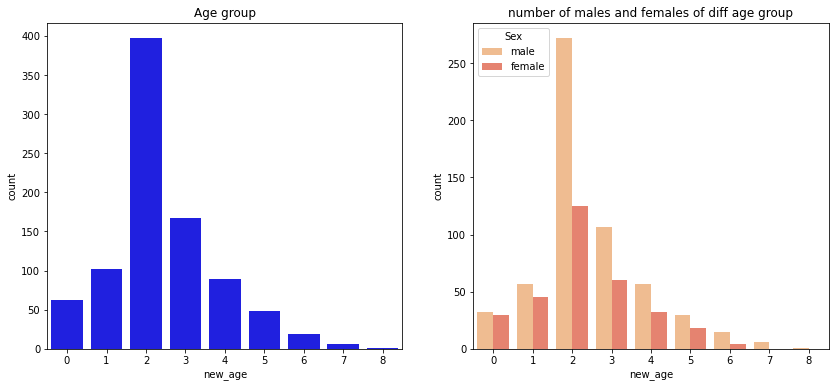

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(x = "new_age", data = train, color = "blue", ax = ax[0])
ax[0].set_title("Age group")
sns.countplot(x = "new_age",hue = "Sex", data = train, ax = ax[1])
ax[1].set_title("number of males and females of diff age group")
plt.show()

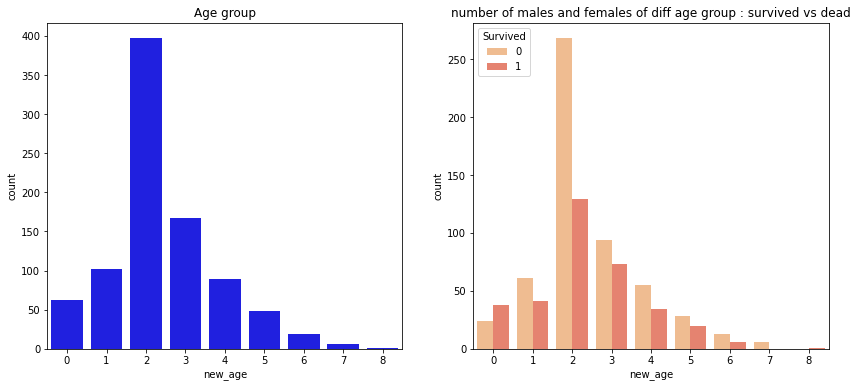

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(x = "new_age", data = train, color = "blue", ax = ax[0])
ax[0].set_title("Age group")
sns.countplot(x = "new_age",hue = "Survived", data = train, ax = ax[1])
ax[1].set_title("number of males and females of diff age group : survived vs dead")
plt.show()

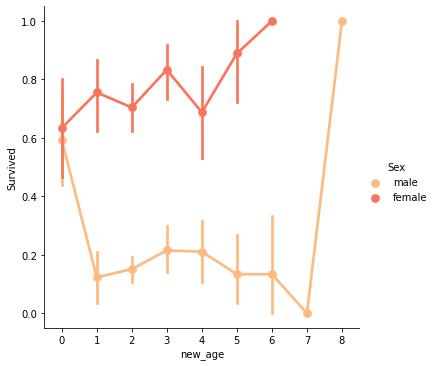

In [23]:
sns.catplot(x = "new_age", y = "Survived", hue = "Sex", data = train, kind = "point")
plt.show()

## Embarked

In [24]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [25]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
train['Embarked'].fillna(value = 'S', inplace = True)

In [27]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

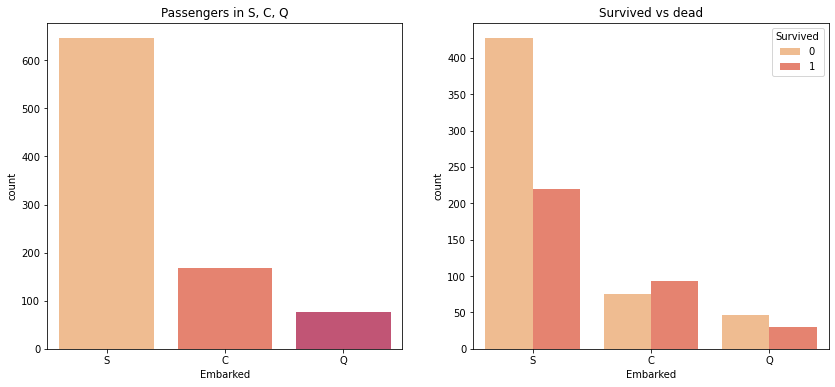

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(x = "Embarked", data = train, ax = ax[0])
ax[0].set_title("Passengers in S, C, Q")
sns.countplot(x = "Embarked", hue = "Survived", data = train, ax = ax[1])
ax[1].set_title("Survived vs dead")
plt.show()  

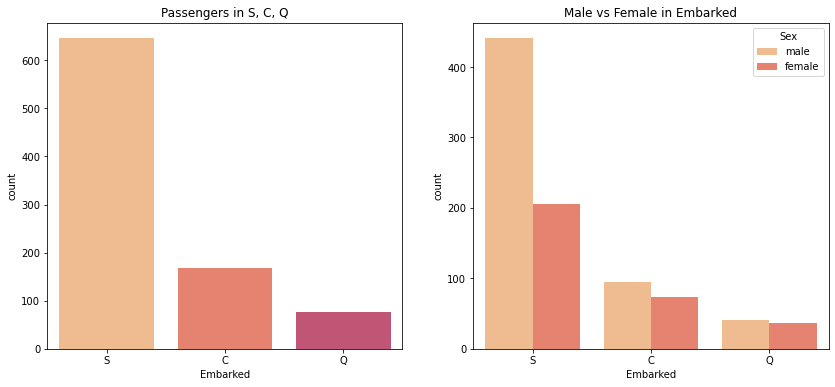

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(x = "Embarked", data = train, ax = ax[0])
ax[0].set_title("Passengers in S, C, Q")
sns.countplot(x = "Embarked", hue = "Sex", data = train, ax = ax[1])
ax[1].set_title("Male vs Female in Embarked")
plt.show()

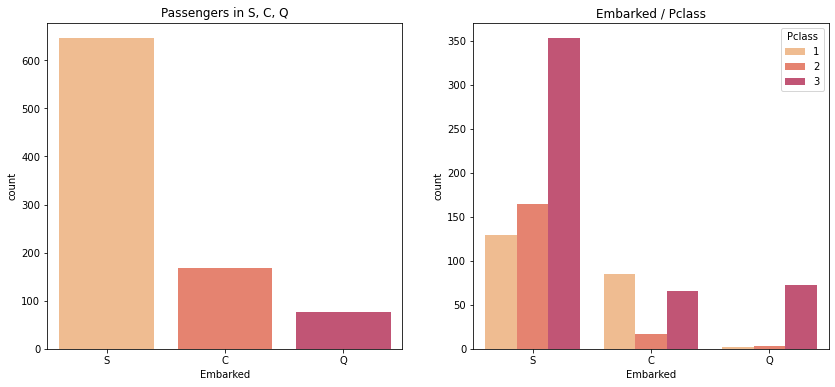

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(x = "Embarked", data = train, ax = ax[0])
ax[0].set_title("Passengers in S, C, Q")
sns.countplot(x = "Embarked", hue = "Pclass", data = train, ax = ax[1])
ax[1].set_title("Embarked / Pclass")
plt.show()

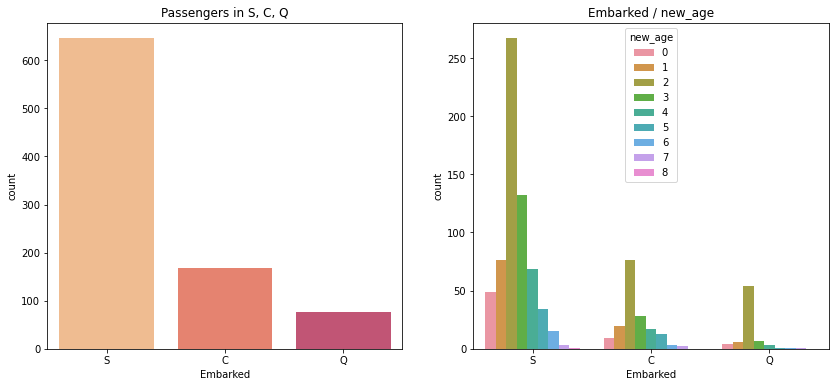

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(x = "Embarked", data = train, ax = ax[0])
ax[0].set_title("Passengers in S, C, Q")
sns.countplot(x = "Embarked", hue = "new_age", data = train, ax = ax[1])
ax[1].set_title("Embarked / new_age")
plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='Sex-Survived'>

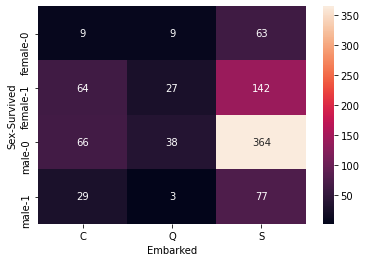

In [32]:
group = train.groupby(['Sex', 'Survived', 'Embarked'])
new_map = group.size().unstack()
sns.heatmap(new_map, annot = True, fmt = "d")

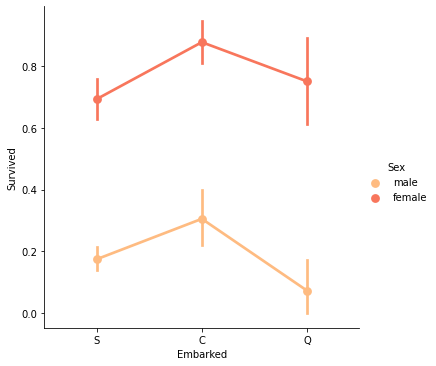

In [33]:
sns.catplot(x = "Embarked", y = "Survived", hue = "Sex", data = train, kind = "point")
plt.show()

## Cabin

In [34]:
train['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
C22 C26        3
E101           3
              ..
D48            1
B82 B84        1
D49            1
A36            1
C110           1
Name: Cabin, Length: 147, dtype: int64

In [35]:
train['Cabin'].fillna(value = 'U', inplace = True)

In [36]:
train['Cabin'].unique()

array(['U', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [37]:
cabin_list = train['Cabin'].tolist()
print(cabin_list)

['U', 'C85', 'U', 'C123', 'U', 'U', 'E46', 'U', 'U', 'U', 'G6', 'C103', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'D56', 'U', 'A6', 'U', 'U', 'U', 'C23 C25 C27', 'U', 'U', 'U', 'B78', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'D33', 'U', 'B30', 'C52', 'U', 'U', 'U', 'U', 'U', 'B28', 'C83', 'U', 'U', 'U', 'F33', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'F G73', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'C23 C25 C27', 'U', 'U', 'U', 'E31', 'U', 'U', 'U', 'A5', 'D10 D12', 'U', 'U', 'U', 'U', 'D26', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'C110', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'B58 B60', 'U', 'U', 'U', 'U', 'E101', 'D26', 'U', 'U', 'U', 'F E69', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'D47', 'C123', 'U', 'B86', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'F2', 'U', 'U', 'C2', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'E33', 'U', 'U', 'U', 'B19', 'U', 'U', 'U', 'A7', 'U', 'U', 'C49', 'U', 'U', 'U

In [38]:
for i in range(len(cabin_list)):
    cabin_list[i] = cabin_list[i][0]
print(cabin_list)

['U', 'C', 'U', 'C', 'U', 'U', 'E', 'U', 'U', 'U', 'G', 'C', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'D', 'U', 'A', 'U', 'U', 'U', 'C', 'U', 'U', 'U', 'B', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'D', 'U', 'B', 'C', 'U', 'U', 'U', 'U', 'U', 'B', 'C', 'U', 'U', 'U', 'F', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'F', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'C', 'U', 'U', 'U', 'E', 'U', 'U', 'U', 'A', 'D', 'U', 'U', 'U', 'U', 'D', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'C', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'B', 'U', 'U', 'U', 'U', 'E', 'D', 'U', 'U', 'U', 'F', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'D', 'C', 'U', 'B', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'F', 'U', 'U', 'C', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'E', 'U', 'U', 'U', 'B', 'U', 'U', 'U', 'A', 'U', 'U', 'C', 'U', 'U', 'U', 'U', 'U', 'F', 'U', 'A', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'F', 'B', 'B', 'U', 'U', 'U', 'U',

In [39]:
train['Cabin_uni'] = cabin_list
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    float64
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Cabin      891 non-null    object 
 10  Embarked   891 non-null    object 
 11  new_age    891 non-null    int64  
 12  Cabin_uni  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 137.5+ KB


In [40]:
train['Cabin_uni'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

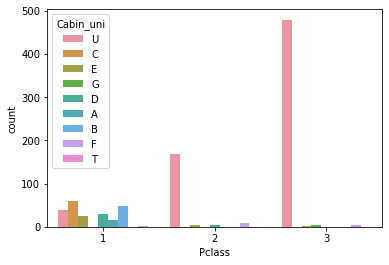

In [41]:
sns.countplot(x = 'Pclass', hue = 'Cabin_uni', data = train)
plt.show()

## Fare

In [42]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [43]:
train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

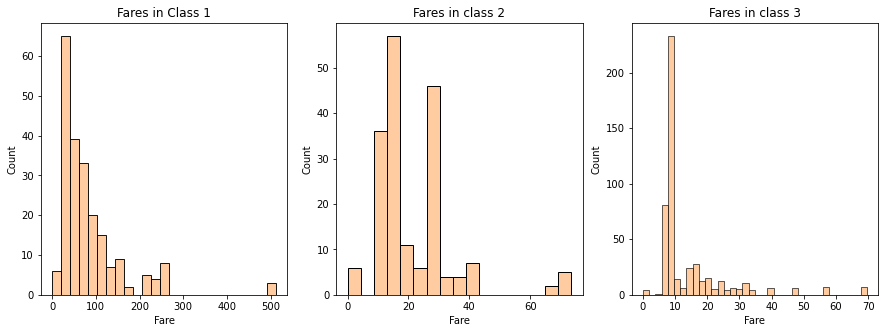

In [50]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
sns.histplot(x = train[train["Pclass"] == 1]["Fare"], ax = ax[0])
ax[0].set_title("Fares in Class 1")
sns.histplot(x = train[train["Pclass"] == 2]["Fare"], ax = ax[1])
ax[1].set_title("Fares in class 2")
sns.histplot(x = train[train["Pclass"] == 3]["Fare"], ax = ax[2])
ax[2].set_title("Fares in class 3")
plt.show()